# ***Blinkit Sales Analysis***

###**This project presents a complete Exploratory Data Analysis (EDA) of Blinkit’s product-level and outlet-level sales data using Python**

####**Importing Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####**Import raw Data**

In [3]:
df = pd.read_csv("blinkit_data.csv")
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


####**Dataset Overview**

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [7]:
df.shape

(8523, 12)

In [8]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


####**Data Cleaning**

In [9]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [12]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [13]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


##***Business Requirement***

####**KPIs Requirement**

In [22]:
#total_sales
total_sales=df['Sales'].sum()
print(f"Total sales: ${total_sales:,.1f}")

#Average_sales
average_sales=df['Sales'].mean()
print(f"Average sales: ${average_sales:,.0f}")

#No of item_sold
no_of_item_sold=df['Sales'].count()
print(f"No of item_sold: {no_of_item_sold:,.0f}")

#Average_rating
average_rating=df['Rating'].mean()
print(f"Average rating: {average_rating:,.1f}")

Total sales: $1,201,681.5
Average sales: $141
No of item_sold: 8,523
Average rating: 4.0


##**Chart's Requirement**

####**Total Sales by Fat Content**

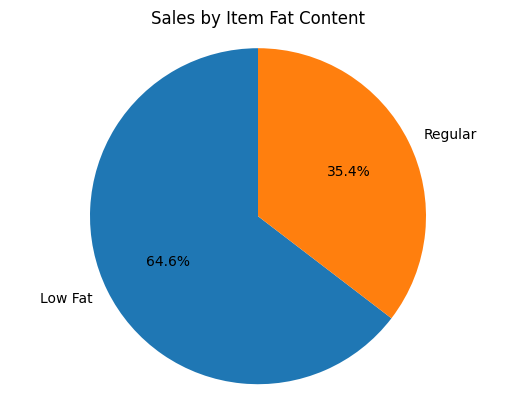

In [15]:
Sales_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(Sales_fat,labels=Sales_fat.index,autopct='%1.1f%%',startangle=90)
plt.title('Sales by Item Fat Content')
plt.axis('equal')
plt.show()

####**Total Sales by Item Type**

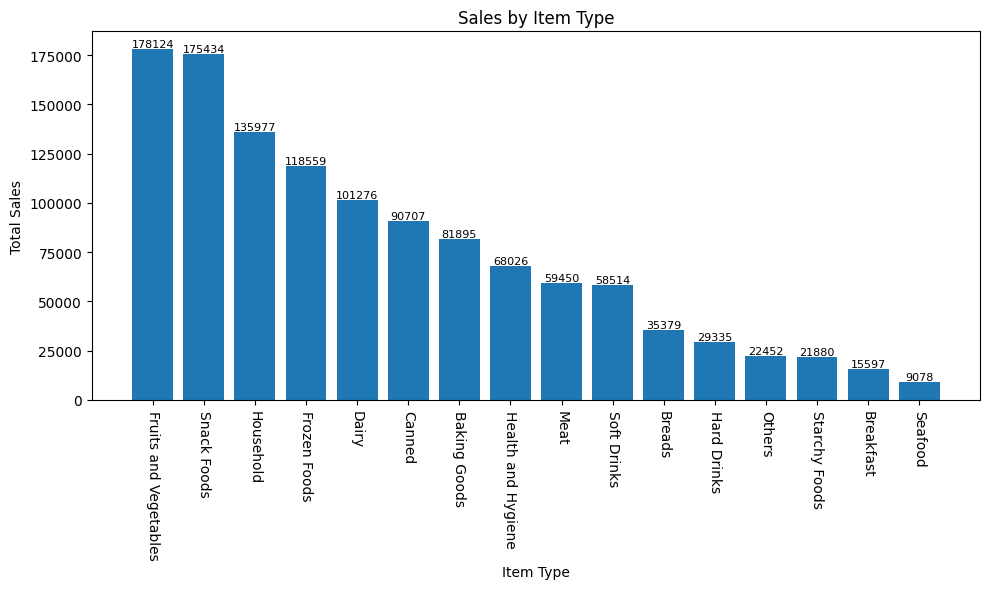

In [16]:
Sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars=plt.bar(Sales_by_type.index,Sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
             f'{bar.get_height():.0f}',ha='center',va='bottom',fontsize=8)
    plt.tight_layout()
plt.show()



####**Fat Content by Outlet for Total Sales**

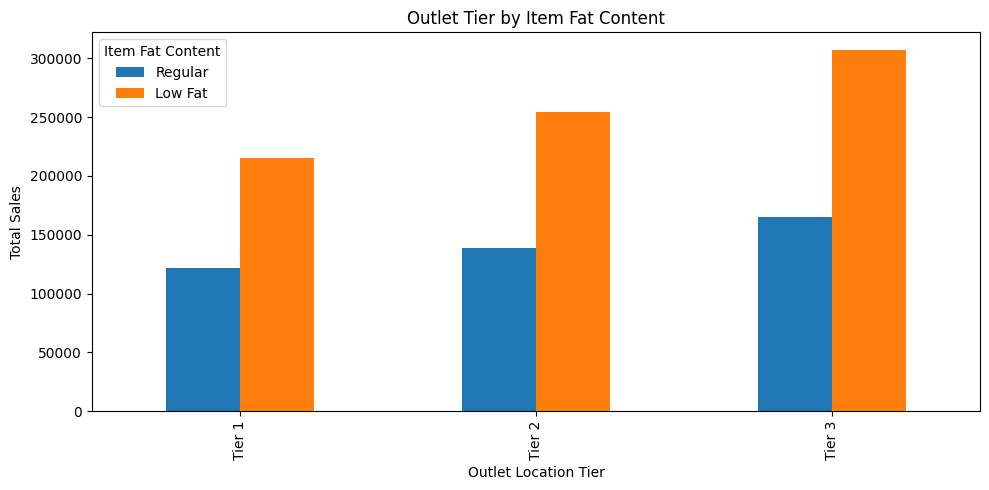

In [17]:
import matplotlib.pyplot as plt

grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

# Reorder columns if they exist
grouped = grouped[['Regular', 'Low Fat']]


ax = grouped.plot(kind='bar', figsize=(10, 5), title='Outlet Tier by Item Fat Content')

plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')


plt.legend(title='Item Fat Content')


plt.tight_layout()

plt.show()


####**Total Sales by Outlet Establishment**

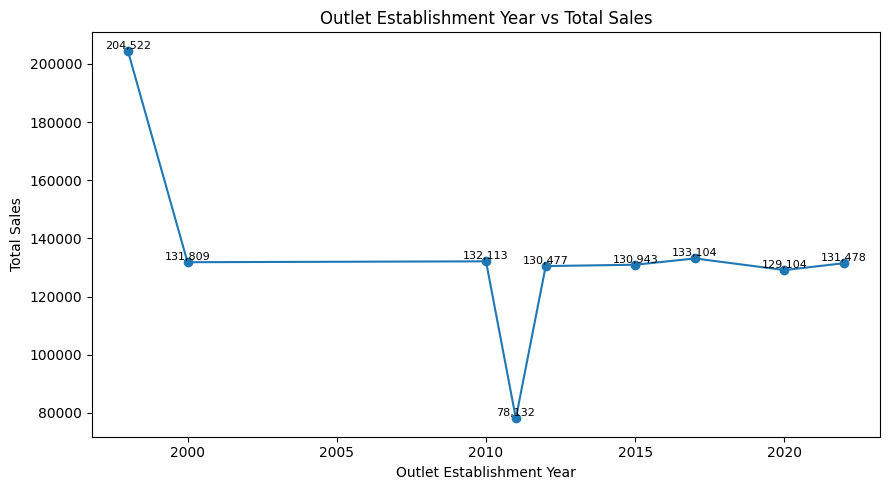

In [18]:
import matplotlib.pyplot as plt


sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment Year vs Total Sales')


for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


####**Sales by Outlet Size**

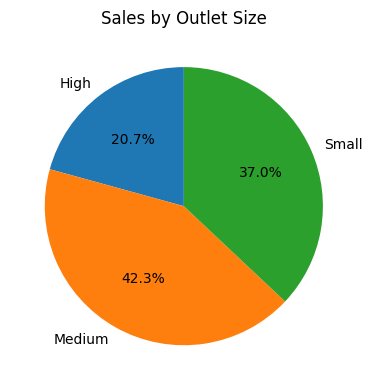

In [19]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%',startangle=90)
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

####**Sales by Outlet Location**

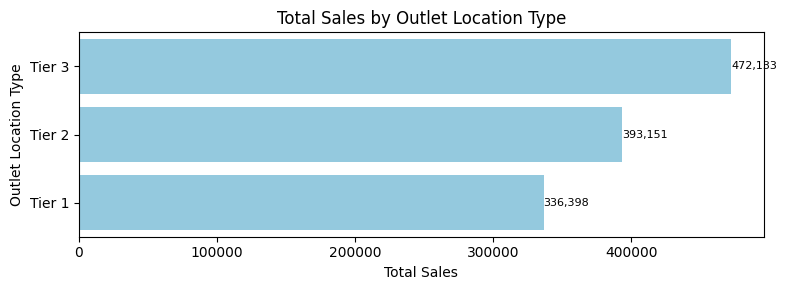

In [28]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))
ax = sns.barplot(
    x='Sales',
    y='Outlet Location Type',
    data=sales_by_location,
    color='skyblue'
)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
for i, value in enumerate(sales_by_location['Sales']):
    plt.text(value, i, f'{value:,.0f}', va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()
